# Importation

In [51]:
!pip install "torch==1.7" "torchvision==0.8"
#!pip install interpret
#!pip install interpolation

In [40]:
from fastai.vision import *
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch 
import math
import interpret as interpret


# Load the data

In [31]:
data = ImageDataBunch.from_folder(path="/content/drive/MyDrive/data", train="train", test="test", valid_pct = 0.25, ds_tfms=get_transforms(), size=224, bs=16)


In [32]:
data.normalize()

ImageDataBunch;

Train: LabelList (429 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
butternut,butternut,butternut,butternut,butternut
Path: /content/drive/MyDrive/data;

Valid: LabelList (143 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
poireau,poivron,tomato,courge,oignon_doux
Path: /content/drive/MyDrive/data;

Test: LabelList (1 items)
x: ImageList
Image (3, 224, 224)
y: EmptyLabelList

Path: /content/drive/MyDrive/data

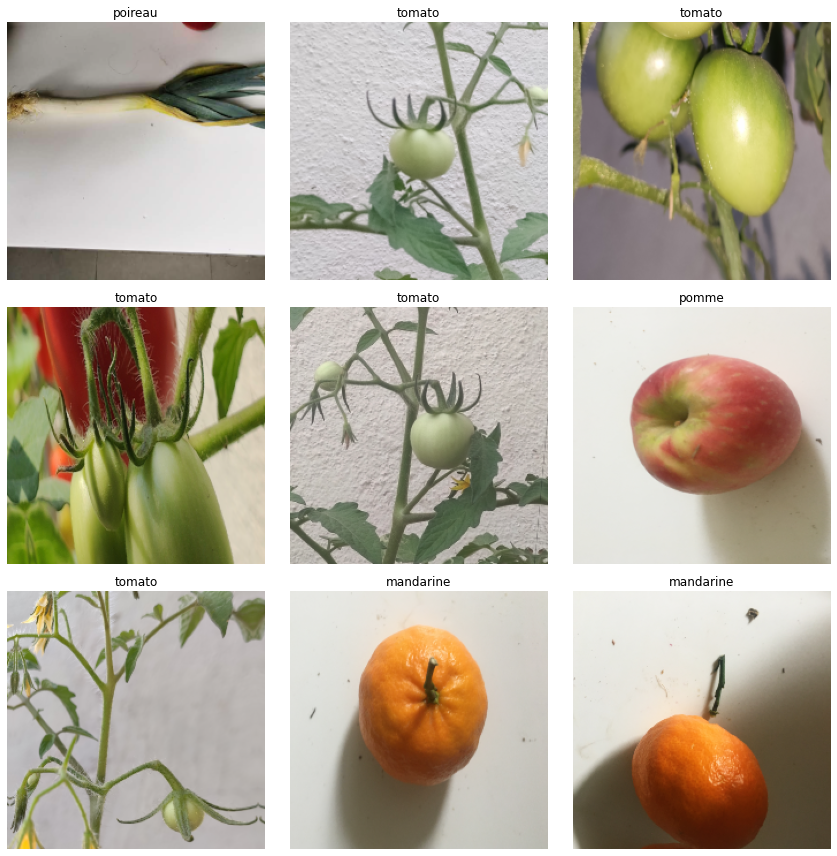

In [33]:
data.show_batch(3)

# Create a model

In [46]:
learn = cnn_learner(data, models.resnet34, metrics = accuracy)
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

# Find the learning rate

In [47]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


We plot a graph with as y we have the train loss and as x we have the learning rate. We are looking for the place on the curve where the slope is the biggest. 

A red dot would guide us to choose the optimal learning rate. 

Min numerical gradient: 4.37E-03
Min loss divided by 10: 1.00E-02


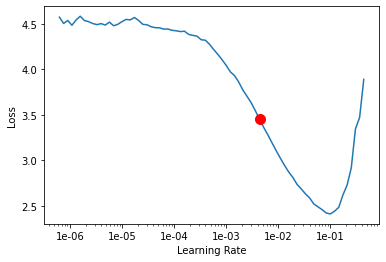

In [48]:
#plot = learn.recorder.plot(suggestion=True)
#plt.legend("Learning rate according to the loss", "Optimal learning rate", loc='upper right')
#plt.title('In quest of the optimal learning rate')
#print(plot)

fig = learn.recorder.plot(suggestion=True)
#fig.s

We look at the graph and we choose ourself the best learning rate for our model. The red dot indicates us the best possible solution. 

# Choose the learning rate

In [49]:
lr = learn.recorder.min_grad_lr
lr = 4.e-3

# Train the model and observation through the epoch

In [38]:
#learn.fit_one_cycle(8, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,3.031903,0.524152,0.832168,01:57
1,1.436722,0.080427,0.979021,01:57
2,0.817316,0.033086,0.993007,01:57
3,0.528197,0.030649,0.993007,01:58
4,0.334143,0.015020,0.993007,01:59
5,0.228768,0.013693,0.993007,01:57
6,0.163168,0.023518,0.993007,01:56
7,0.131693,0.022916,0.993007,01:56


In [50]:
learn.fit_one_cycle(3, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.953250,0.092710,0.958042,01:58
1,0.903534,0.043197,0.986014,01:59
2,0.525916,0.041533,0.979021,01:59


We want to see where the model made the maximum of mistakes 

prediction/ réalité/  loss/ probalité (confiant à tant de pourcent) (pourcentage de confiance) 

In [52]:
interp = ClassificationInterpretation.from_learner(learn)

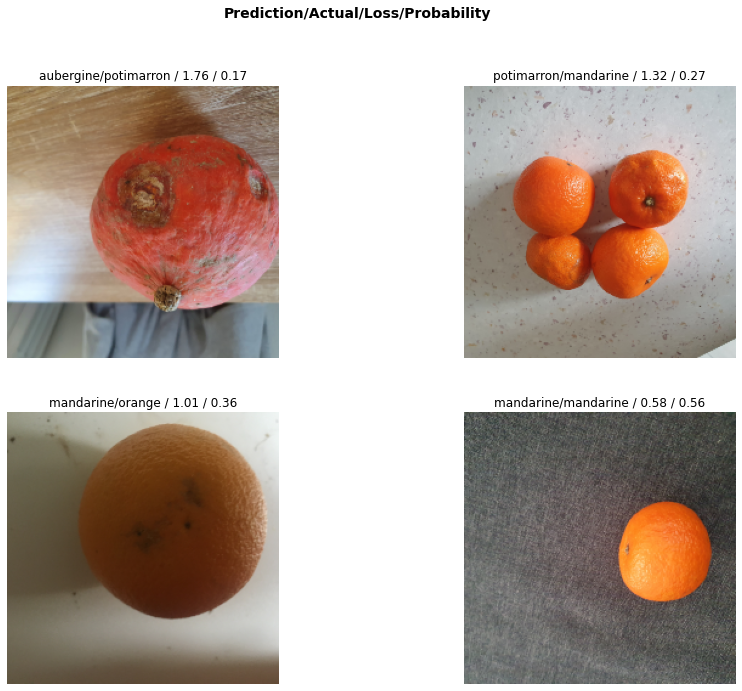

In [53]:
interp.plot_top_losses(4, figsize=(15, 11))

Save model (architecture et poid) and optimizer (methode d'optimisation (gradient, ..)

be careful to download it after in a safe place because if the model runs again it will delete it and make a new one. 

In [54]:
learn.save("912_model")

# Confusion Matrix 

None


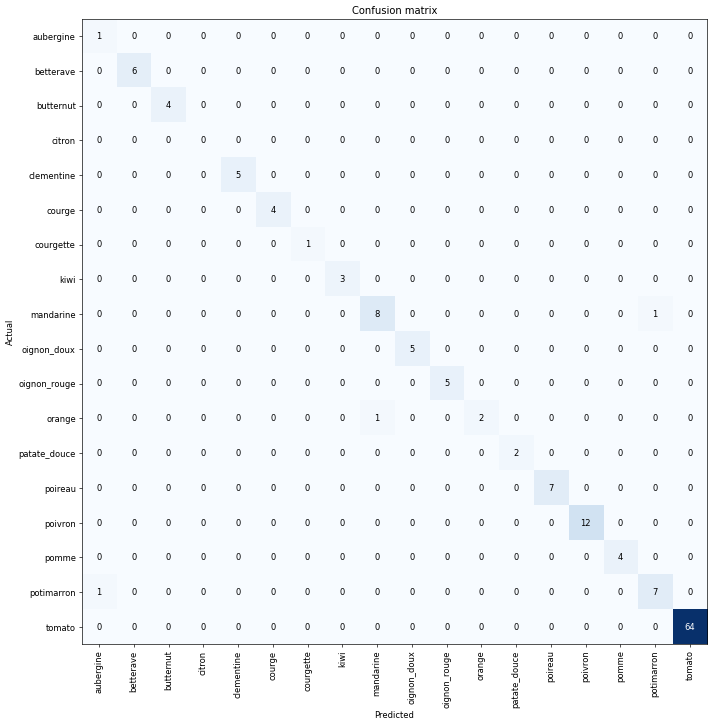

In [55]:
confusion = interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
print(confusion)

# Affinage du model

passé d'un model generaliste à specialisé 

now, unfreeze : affinage 


In [56]:
learn.unfreeze()
# arès que le odèle soit bien entraine, facon de grapiller pourcent, 
# entrainement sur couche plus pfofondes : tous les poids sont figés sauf sur la derniere 
# debloqué les poids sur l'avant derniere couche par exemple 
# réentrainement des couhcehs supplémentaires : entrainement de poids supplémentaires 
# epoch : intégraliter des données vues par le nn 
# a la fin de chaque epoch poids updated 


In [57]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Failed to compute the gradients, there might not be enough points.
None


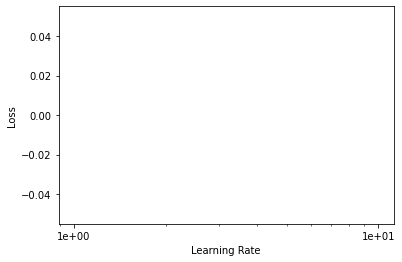

In [58]:
#plot = learn.recorder.plot(suggestion=True)
#print(plot)
learn.recorder.plot(suggestion=True)


on entraine sur peu de cycle 

In [59]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.086315,0.032490,0.993007,01:59
1,0.117602,0.024142,0.986014,01:58


# Confusion Matrix

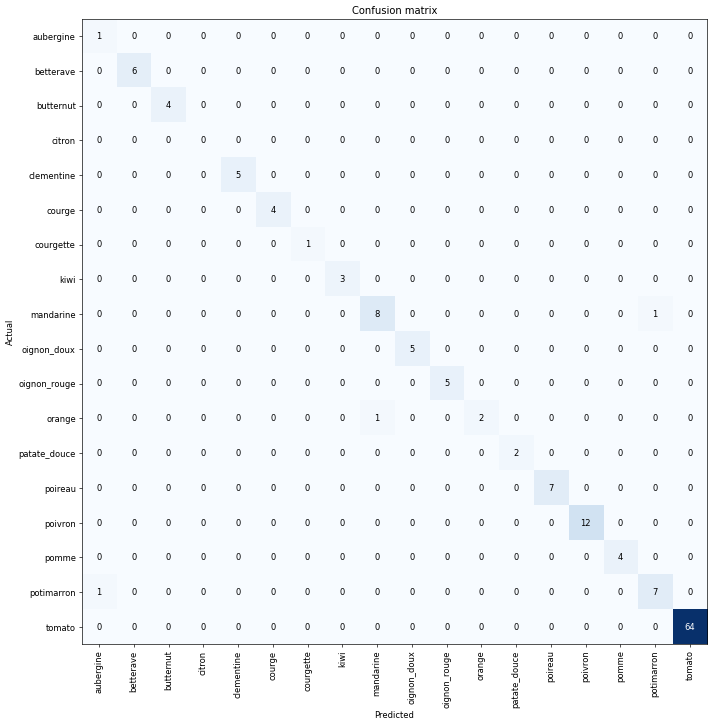

In [61]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

# Test

We test it on only one image of one category 

In [77]:
img = open_image('/content/drive/MyDrive/data/test/aubergine/Aubergine.jpg')

In [78]:
y_pred = learn.predict(img)

In [79]:
category = data.classes[y_pred[1].item()]

In [80]:
print(category)

clementine


Now we do a loop through all the folder of the category 

We want to the ratio and the score after the prediction 

In [66]:
preds = learn.get_preds(ds_type=DatasetType.Valid)
preds

[tensor([[1.2357e-06, 2.1180e-07, 5.1734e-07,  ..., 1.9116e-07, 3.4732e-07,
          4.3605e-07],
         [8.6595e-07, 1.6869e-07, 1.2276e-06,  ..., 1.0651e-06, 3.1387e-08,
          3.5289e-08],
         [8.1894e-09, 1.5148e-07, 7.2631e-08,  ..., 2.9417e-09, 9.2539e-08,
          1.0000e+00],
         ...,
         [5.8942e-07, 1.5044e-06, 3.1675e-06,  ..., 1.1851e-06, 1.1307e-06,
          9.9994e-01],
         [1.1530e-05, 3.5965e-06, 1.8917e-04,  ..., 9.9266e-07, 3.9824e-05,
          9.9891e-01],
         [1.0039e-06, 1.7826e-06, 3.3132e-06,  ..., 2.2173e-05, 1.1997e-06,
          9.9994e-01]]),
 tensor([13, 14, 17,  5,  9,  4, 12,  8, 17, 17, 17, 14, 17,  1, 17, 17,  4, 17,
         17,  8, 14,  0,  7,  9, 17, 16, 17, 17, 15,  2, 17,  5, 10, 16, 17, 17,
         10, 10, 13, 17,  9,  2, 16,  8,  7,  8, 15,  4, 13, 17, 14, 17, 10, 16,
          1,  4, 16,  9,  6, 17, 17,  7, 17, 14, 17,  8, 17,  1, 14, 17, 14, 17,
         17,  2, 17,  8, 17, 14, 13,  8, 17, 17, 11, 12, 13, 17, 1

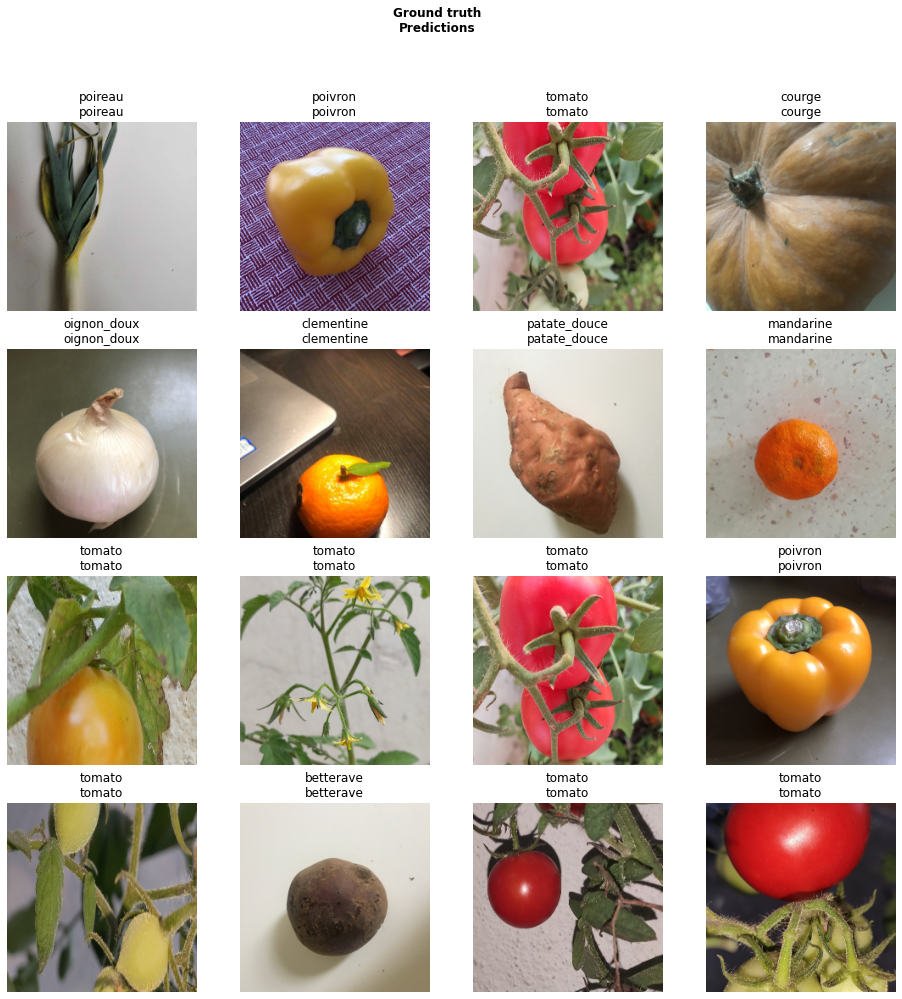

In [69]:
learn.show_results(ds_type=DatasetType.Valid, nrows=6)

In [70]:
#interp = ClassificaitonInterpretation.from_learner(learn)

NameError: ignored